In [26]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
from skimage import io
from matplotlib import pyplot as plt
import cv2
from skimage.feature import hog
from PIL import Image, ImageChops
def data_dictionary():
    path_train = "/home/roman/Documents/hse/skin_problems/train/"
    train_data_categories = os.listdir(path_train)
    list_train = train_data_categories
    train_dictionary = {"image_path": [], "target": [], "Label": [], "Image": []}
    k = 0
    for i in list_train:
        path_train_item = path_train + "/" + i
        image_list_train = os.listdir(path_train_item)
        for j in image_list_train:
            img_path_train = path_train_item + "/" + j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)
            train_dictionary['Label'].append(i)
            train_dictionary['Image'].append(io.imread(img_path_train))
        k += 1
    return pd.DataFrame(train_dictionary)



df = data_dictionary()
print(f"df = {df}")

df =                                               image_path  target  \
0      /home/roman/Documents/hse/skin_problems/train/...       0   
1      /home/roman/Documents/hse/skin_problems/train/...       0   
2      /home/roman/Documents/hse/skin_problems/train/...       0   
3      /home/roman/Documents/hse/skin_problems/train/...       0   
4      /home/roman/Documents/hse/skin_problems/train/...       0   
...                                                  ...     ...   
15552  /home/roman/Documents/hse/skin_problems/train/...      22   
15553  /home/roman/Documents/hse/skin_problems/train/...      22   
15554  /home/roman/Documents/hse/skin_problems/train/...      22   
15555  /home/roman/Documents/hse/skin_problems/train/...      22   
15556  /home/roman/Documents/hse/skin_problems/train/...      22   

                                                   Label  \
0           Light Diseases and Disorders of Pigmentation   
1           Light Diseases and Disorders of Pigmentation  

In [2]:
pip install "numpy>=1.16.5,<1.23.0"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Если не будет импортироваться HOG (from skimage.feature import hog) то установить numpy нужной версии 

Создать распределение по количеству картинок

/tmp/ipykernel_854482/1080024706.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sns.barplot(x=labels.index, y=labels.values, palette=np.array(pal[::-1])[rank])
/tmp/ipykernel_854482/1080024706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels.index, y=labels.values, palette=np.array(pal[::-1])[rank])
/tmp/ipykernel_854482/1080024706.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=labels.index, y=labels.values, palette=np.array(pal[::-1])[rank])


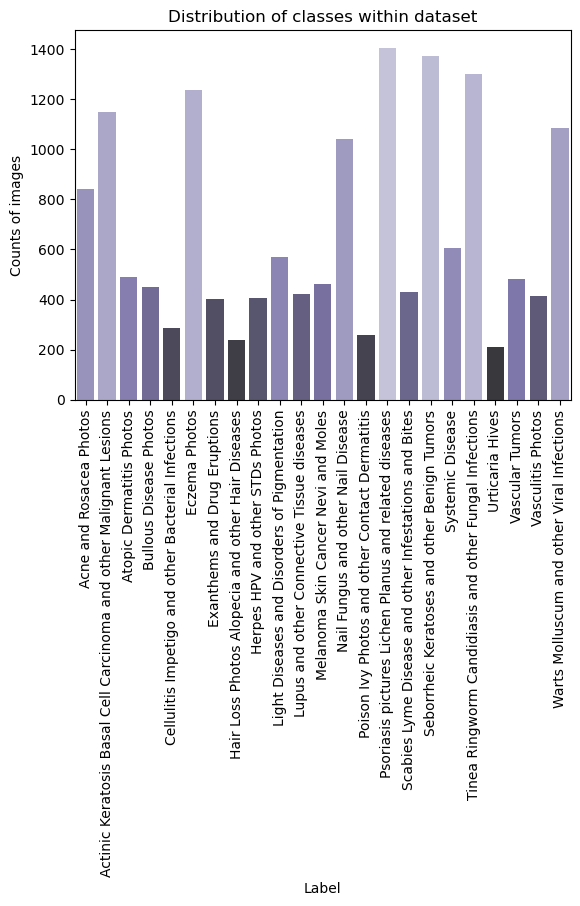

In [4]:
def create_bar_plot_with_counts(df):
    labels = df.groupby("Label")["image_path"].count()
    pal = sns.color_palette("Purples_d", len(labels))
    rank = labels.argsort().argsort()
    sns.barplot(x=labels.index, y=labels.values, palette=np.array(pal[::-1])[rank])
    plt.title("Distribution of classes within dataset")
    plt.ylabel("Counts of images")
    plt.xticks(rotation=90)
    plt.show()
    
create_bar_plot_with_counts(df)

Распределение по каналам

In [ ]:
def calculate_channel_average(img, channel):
    channel_dict = {"R": 0, "G": 1, "B": 2}
    channel_idx = channel_dict[channel]
    channel_intensities = np.array([row[:, channel_idx] for row in img]).flatten()
    return np.mean(channel_intensities)

def plot_channel_intensity_barplot(df, channel):
    title_dict = {"r": "red", "g": "green", "b": "blue"}
    palet_dict = {"r": "Reds_d", "g": "Greens_d", "b": "Blues_d"}
    plt.figure(figsize=(10, 3))

    values = df["image_path"].values
    pal = sns.color_palette(palet_dict[channel], len(values))
    rank = values.argsort().argsort()
    sns.barplot(x=df["Label"].values, y=values, palette=np.array(pal[::-1])[rank])
    plt.ylabel("Intensity")
    plt.title(f"Average {title_dict[channel]} channel intensity for classes")
    plt.xticks(rotation=90)
    plt.show()
    
red_channel_average = df.groupby("Label").agg({"image_path": lambda s: np.mean(
    [calculate_channel_average(io.imread(img), channel="R") for img in s])}).reset_index()
green_channel_average = df.groupby("Label").agg({"image_path": lambda s: np.mean(
    [calculate_channel_average(io.imread(img), channel="G") for img in s])}).reset_index()
blue_channel_average = df.groupby("Label").agg({"image_path": lambda s: np.mean(
    [calculate_channel_average(io.imread(img), channel="B") for img in s])}).reset_index()

plot_channel_intensity_barplot(red_channel_average, "r")
plot_channel_intensity_barplot(green_channel_average, "g")
plot_channel_intensity_barplot(blue_channel_average, "b")

Совокупный отчет по каналам

In [ ]:
def set_type_array(channel,df):
    df["type"] = [channel for _ in range(len(df))]


def create_concatenated_plot(channel_averages):
    plt.figure(figsize=(15, 5))
    colors = [[0.8, 0.3, 0.3], [0.1, 0.6, 0.2], [0.2, 0.3, 0.6]]
    ax = sns.barplot(x=channel_averages["Label"].values, y="image_path", hue="type",
                     data=channel_averages, palette=colors)
    plt.xlabel("Label")
    plt.title("Average of channel intensities grouped by class")
    ax.legend(title="Channel", loc="lower right")
    plt.xticks(rotation=90)
    plt.show()

set_type_array("red", red_channel_average)
set_type_array("green", green_channel_average)
set_type_array("blue", blue_channel_average)

channel_averages = pd.concat([red_channel_average, green_channel_average, blue_channel_average])

create_concatenated_plot(channel_averages)

Распределение размеров картинок

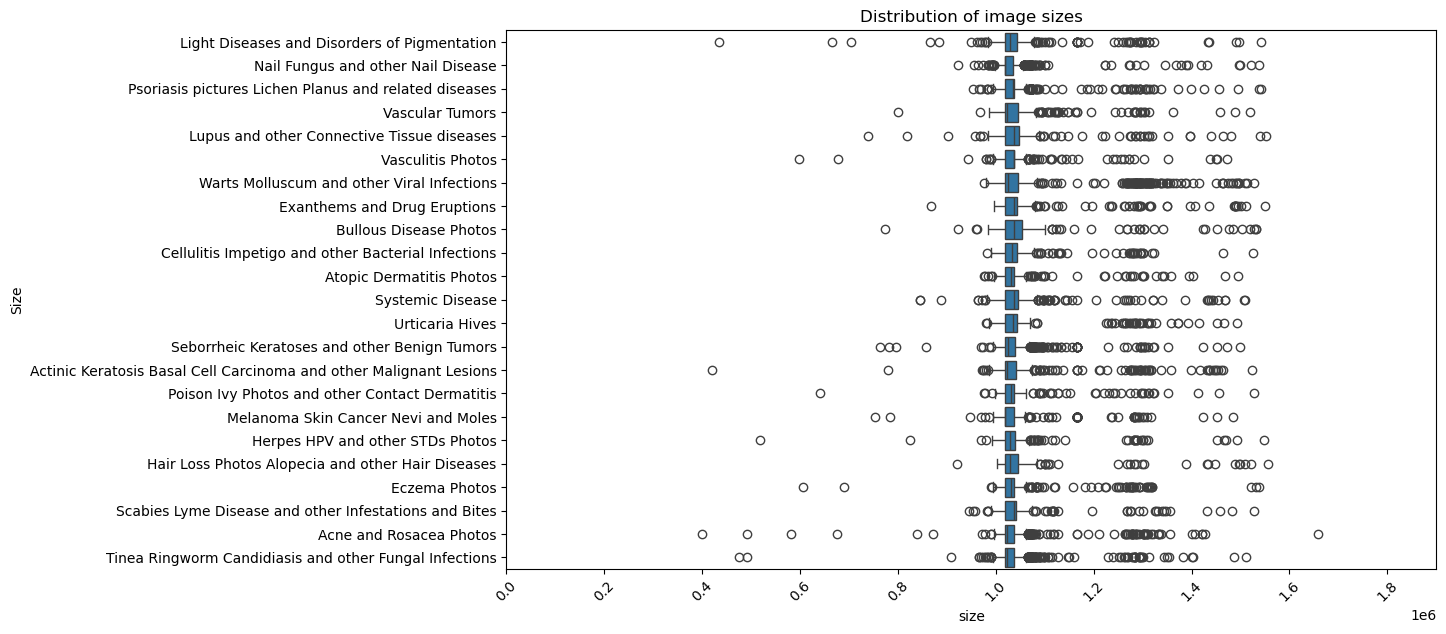

In [7]:
def create_distribution_image_size(df):
    plt.figure(figsize=(12, 7))
    sns.boxplot(y=df["Label"].values, x="size", data=df, orient="h")
    plt.title("Distribution of image sizes")
    plt.xticks(np.arange(0, 1900000, 200000), rotation=45)
    plt.xlim(0, 1900000)
    plt.ylabel("Label");
    plt.ylabel("Size");
    plt.show()
    
df["size"] = df["Image"].apply(np.size)

create_distribution_image_size(df)

Preprocessing, распределение ширины и высоты в картинках

Rescaling to h: 544.4372308285659, w: 697.9364285301126
Rescaling to h: 544.4372308285659, w: 697.9364285301126


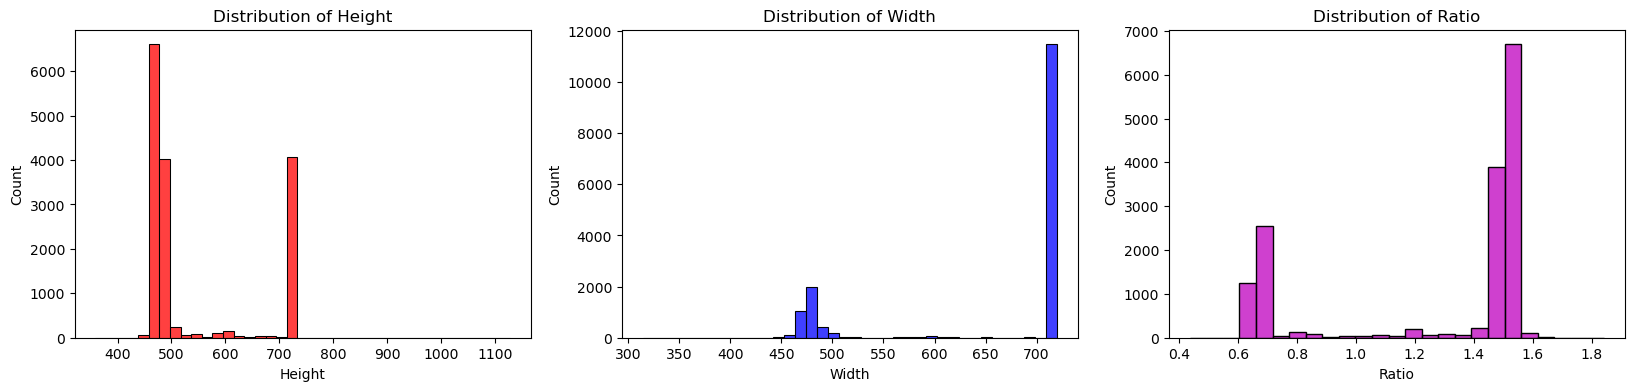

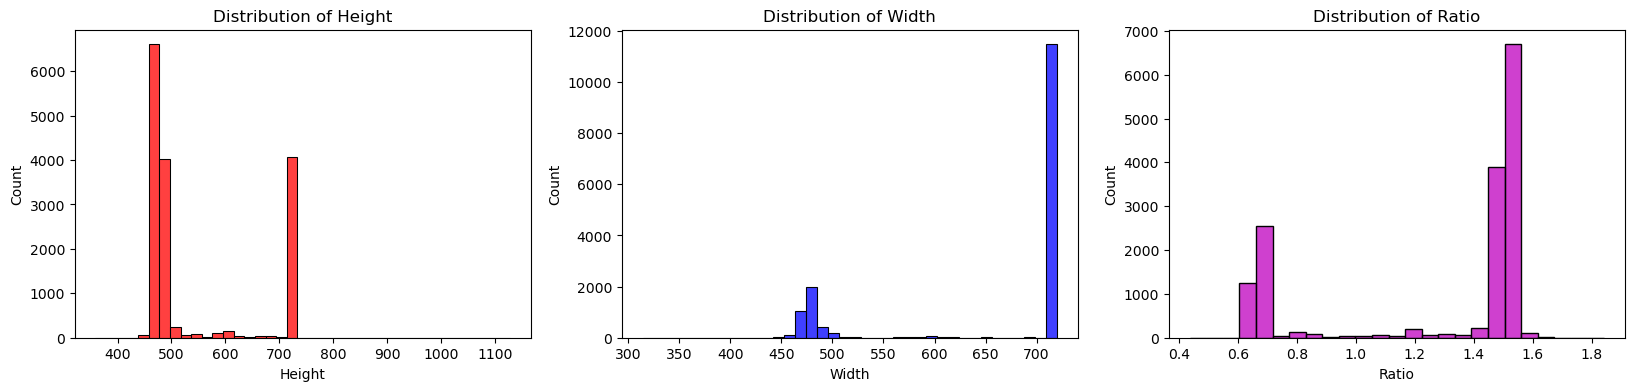

In [16]:
def get_trimmed_image(image):
    """
    Returns image without white border if such border exists.
    If not, returns original image
    """
    imagePIL = Image.fromarray(np.array(image))
    bg = Image.new(imagePIL.mode, imagePIL.size, imagePIL.getpixel((0,0)))
    diff = ImageChops.difference(imagePIL, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        trimmed_img = imagePIL.crop(bbox)
        return np.array(trimmed_img)
    return image
def resize_image(image, size):
    return cv2.resize(image, size, interpolation = cv2.INTER_AREA)

def create_plot_width_height_distribution(df):
    height = df["Image"].apply(len)
    width = df["Image"].apply(lambda x: len(x[0]))
    ratio = width/height
    height = df["Image"].apply(len)
    width = df["Image"].apply(lambda x: len(x[0]))
    ratio = width/height
    f, axes = plt.subplots(figsize=(20,4), ncols=3, nrows=1)
    sns.histplot(height,ax=axes[0], color="r")
    sns.histplot(width,ax=axes[1], color="b")
    sns.histplot(ratio,ax=axes[2], color="m")
    axes[0].set_xlabel("Height")
    axes[1].set_xlabel("Width")
    axes[2].set_xlabel("Ratio")
    axes[0].title.set_text('Distribution of Height')
    axes[1].title.set_text('Distribution of Width')
    axes[2].title.set_text('Distribution of Ratio')
    mean_ratio = np.mean(ratio)
    scale_height = np.mean(height)
    scale_width = scale_height * mean_ratio
    scaling_size = (int(scale_width), int(scale_height))
    print(f"Rescaling to h: {scale_height}, w: {scale_width}");
    f, axes = plt.subplots(figsize=(20,4), ncols=3, nrows=1)
    sns.histplot(height, ax=axes[0], color="r")
    sns.histplot(width,  ax=axes[1], color="b")
    sns.histplot(ratio,  ax=axes[2], color="m")
    axes[0].set_xlabel("Height")
    axes[1].set_xlabel("Width")
    axes[2].set_xlabel("Ratio")
    axes[0].title.set_text('Distribution of Height')
    axes[1].title.set_text('Distribution of Width')
    axes[2].title.set_text('Distribution of Ratio')
    mean_ratio = np.mean(ratio)
    scale_height = np.mean(height)
    scale_width = scale_height * mean_ratio
    scaling_size = (int(scale_width), int(scale_height))
    print(f"Rescaling to h: {scale_height}, w: {scale_width}")
    df["Scaled_Image"] = df["Image"].apply(resize_image, args=(scaling_size,))
    plt.show()
create_plot_width_height_distribution(df)

Функции анализа цветов

In [17]:
def image_size(image):
    """
    Returns the pixel size of the image
    """
    return image.size
def grayscale_intensity(image):
    """
    Calculating the average grayscale intensity for all pixels given an image
    """
    grayscaled_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(grayscaled_image)

def aspectratio(image):
    """
    Returns the aspect ratio of the image (width/height)
    """
    return len(image[0])/len(image)
def standard_deviation_channel_intensity(image, channel):
    """
    Returning the average channel intensity (R, G or B) of an image
    """
    channel_dict = {"R": 0, "G": 1, "B": 2}
    channel_idx = channel_dict[channel]
    channel_intensities = np.array([row[:, channel_idx] for row in image]).flatten()
    return np.std(channel_intensities)

def average_channel_intensity(image, channel):
    """
    Returning the average channel intensity (R, G or B) of an image
    """
    channel_dict = {"R": 0, "G": 1, "B": 2}
    channel_idx = channel_dict[channel]
    channel_intensities = np.array([row[:, channel_idx] for row in image]).flatten()
    return np.mean(channel_intensities)

df['Size'] = df['Image'].apply(image_size)
df['AspectRatio'] = df['Image'].apply(aspectratio)

df['Red_intensity'] = df['Scaled_Image'].apply(lambda i: average_channel_intensity(i, 'R'))
df['Green_intensity'] = df['Scaled_Image'].apply(lambda i: average_channel_intensity(i, 'G'))
df['Blue_intensity'] = df['Scaled_Image'].apply(lambda i: average_channel_intensity(i, 'B'))
df['Std_Red_intensity'] = df['Scaled_Image'].apply(lambda i: standard_deviation_channel_intensity(i, 'R'))
df['Std_Green_intensity'] = df['Scaled_Image'].apply(lambda i: standard_deviation_channel_intensity(i, 'G'))
df['Std_Blue_intensity'] = df['Scaled_Image'].apply(lambda i: standard_deviation_channel_intensity(i, 'B'))
df['Grayscale_intensity'] = df['Scaled_Image'].apply(grayscale_intensity)

HOG

In [ ]:
def get_hog_features(image):
    """
    Gets the histogram of oriented gradients for an image
    """
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    return fd
def get_hog_mean(img):
    """
    Gets the mean of the HOG response map
    """
    fd = get_hog_features(img)
    return np.mean(fd) if len(fd) else 0
    
def get_hog_std(img):
    """
    Gets the standard deviation of the HOG response map
    """
    fd = get_hog_features(img)
    return np.std(fd) if len(fd) else 0

def create_hog_histogram(df):  
    f, axes = plt.subplots(figsize=(20, 10), ncols=2, nrows=1)
    sns.boxplot(y=df["Label"].values, x="HOG_mean", data=df, orient="h", ax=axes[0])
    sns.boxplot(y=df["Label"].values, x="HOG_std", data=df, orient="h", ax=axes[1])
    axes[0].set_xlim(0.28, 0.36)
    axes[0].title.set_text("Distribution of HOG descriptor mean")
    axes[1].title.set_text("Distribution of HOG descriptor standard deviation")
    axes[0].set_xlabel("HOG Mean")
    axes[1].set_xlabel("HOG Standard Devioation")
    plt.show()
    
df['HOG_mean'] = df["Image"].apply(lambda img: get_hog_mean(img))
df['HOG_std'] = df["Image"].apply(lambda img: get_hog_std(img))

create_hog_histogram(df)



In [ ]:
Создать распределение количества кругов в картинке

In [ ]:
def find_hough_circles(image, retry=False):
    """
    Finding the Hough Circles in a given image
    """
    try:
        img = image.copy()
        
        if retry:
            img = img.astype('uint8')
        
        img = cv2.medianBlur(img, 9)
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Finding circles using Hough Transform
        circles = cv2.HoughCircles(gray_img,
                                   cv2.HOUGH_GRADIENT,
                                   dp=1,
                                   minDist=40,
                                   param1=30,
                                   param2=50,
                                   minRadius=0,
                                   maxRadius=130)
        
    except:
        # Retry when it has to be changed to type uint8, which is only for augmented images
        circles = find_hough_circles(image, retry=True)
    
    return circles if circles is not None else np.array([[[]]])
    
def count_hough_circles(image):
    """
    Returning the number of Hough Circles in the input image
    """
    return find_hough_circles(image).shape[1]

def create_hist_circles(df):
    df['Circle_Count'] = df["Image"].apply(lambda img: count_hough_circles(img))
    plt.figure(figsize=(12,7))
    ax = sns.boxplot(y=df["Label"].values, x="Circle_Count", data=df, orient="h")
    ax.set_xlim(-10, 155);
    plt.show()

create_hist_circles(df)

In [ ]:
Harris Corner 

In [ ]:
def get_harris_corners_coordinates(img):
    """
    Returns a matrix containing the Harris Corners of an image. Coordinates mostly used for visualizing.
    """
    image = img.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(gray, 200, 0.75, 100)
    return np.int0(corners) if corners is not None else np.array([])


def get_harris_corners_count(img):
    """
    Returns the number of Harris Corners in a given image
    """
    return len(get_harris_corners_coordinates(img))


def visualize_harris_corners(img):
    """
    Visualize the harris corners of an image
    """
    image = img.copy()
    corners = get_harris_corners_coordinates(image)
    for i in corners:
        x,y = i.ravel()
        cv2.circle(image, (x, y), 3, (255, 0, 200), -1)
    
    plt.axis('off')
    plt.imshow(image)
    plt.show();

    
def get_harris_corner_mean(img):
    """
    Returns the mean of the non-zero harris corners. 
    The Harris Corners are found at the local maximas of the corners response map
    """
    image = img.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    corners = np.where(corners > 0)
    return np.mean(corners)

df["Harris_Corner_Count"] = df["Image"].apply(lambda img: get_harris_corners_count(img))
df["Harris_Corner_Mean"] = df["Image"].apply(lambda img: get_harris_corner_mean(img))

def create_harris_corner_hist(df):
    # Visualizing count of corner in images among classes
    f, axes = plt.subplots(figsize=(20, 10), ncols=2, nrows=1)
    sns.boxplot(y=df["Label"].values, x="Harris_Corner_Count", data=df, orient="h", ax=axes[0])
    sns.boxplot(y=df["Label"].values, x="Harris_Corner_Mean", data=df, orient="h", ax=axes[1]);
    axes[0].set_xlim(0, 12.5)
    axes[1].set_xlim(0, 750)
    axes[0].title.set_text("Distritbution of Harris corner count")
    axes[1].title.set_text("Distritbution of mean Harris corner significance")
    axes[0].set_xlabel("# of Harris corners")
    axes[1].set_xlabel("Mean of harris corner response map")
    plt.show()

create_harris_corner_hist(df)